In [3]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [4]:
card2021 = dd.read_csv(r'훈련생 전달용\iMBANK_CARD_DATA_2021(K-DigitalTraining)\iMBANK_CARD_DATA_2021(K-DigitalTraining).csv', encoding = 'cp949')
card2022 = dd.read_csv(r'훈련생 전달용\iMBANK_CARD_DATA_2022(K-DigitalTraining)\iMBANK_CARD_DATA_2022(K-DigitalTraining).csv', encoding = 'cp949')
card2023 = dd.read_csv(r'훈련생 전달용\iMBANK_CARD_DATA_2023(K-DigitalTraining)\iMBANK_CARD_DATA_2023(K-DigitalTraining).csv', encoding = 'cp949')

In [5]:
df1 = card2021.compute()

In [ ]:
# df2 = card2022.compute()
# df3 = card2023.compute()

In [4]:
df1

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,202112,4080934272,일반한식,경상북도,경주시,5번이하,20000
1,202112,4116127380,일반한식,경상북도,경주시,5번이하,20000
2,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000
3,202112,2950007638,일반한식,경상북도,경주시,5번이하,60000
4,202112,2931907302,일반한식,경상북도,경주시,5번이하,10000
...,...,...,...,...,...,...,...
1070000,202101,9436485459,일식·회집,경상북도,상주시,5번이하,40000
1070001,202101,4079854553,일식·회집,경상북도,상주시,5번이하,90000
1070002,202101,9986820487,일식·회집,경상북도,상주시,5번이하,10000
1070003,202101,8230823000,일식·회집,경상북도,상주시,5번이하,20000


# 컬럼 확인

In [ ]:
df1['승인건수'].value_counts()

In [ ]:
df1['승인건수'].unique()

In [ ]:
df1['승인금액'].describe()

In [ ]:
승인금액 = np.random.lognormal(mean=np.log(52992), sigma=np.log(1.5), size=100000) 

plt.figure(figsize=(8, 6))
plt.boxplot(승인금액, vert=True, patch_artist=True, showfliers=True)
plt.title('승인금액 박스플롯')
plt.ylabel('승인금액')
plt.yscale('log')  
plt.show()

# 승인건수 & 승인금액 점수

In [9]:
df1['승인건수점수'] = 0

df1['승인건수점수'] = df1['승인건수'].apply(lambda x: 1 if x == '5번이하' else 
                                              2 if x == '5번초과 10번이하' else 
                                              3 if x == '10번초과 15번이하' else 
                                              4 if x == '15번초과 20번이하' else 
                                              5 if x == '20번 초과' else 0)

In [7]:
df1['승인건수평균'] = 0

df1['승인건수평균'] = df1['승인건수'].apply(lambda x: 2.5 if x == '5번이하' else 
                                              7.5 if x == '5번초과 10번이하' else 
                                              12.5 if x == '10번초과 15번이하' else 
                                              17.5 if x == '15번초과 20번이하' else 
                                              22.5 if x == '20번 초과' else 0)

In [8]:
df1['승인금액2'] = df1['승인금액'] / df1['승인건수평균']
df1['승인금액점수'] = 0

df1['승인금액점수'] = df1['승인금액2'].apply(lambda x: 1 if x <= 10000 else 
                                              2 if 10000 < x <= 40000 else 
                                              3 if 40000 < x <= 80000 else 
                                              4 if 80000 < x <= 1300000 else 
                                              5 if 130000 < x <= 3000000 else 
                                              6 if 300000 < x  else 0)

In [12]:
df1['승인점수'] = df1['승인건수점수'] + df1['승인금액점수']

In [13]:
df1

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,승인건수점수,승인건수평균,승인금액2,승인금액점수,승인점수
0,202112,4080934272,일반한식,경상북도,경주시,5번이하,20000,1,2.5,8000.0,1,2
1,202112,4116127380,일반한식,경상북도,경주시,5번이하,20000,1,2.5,8000.0,1,2
2,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,1,2.5,8000.0,1,2
3,202112,2950007638,일반한식,경상북도,경주시,5번이하,60000,1,2.5,24000.0,2,3
4,202112,2931907302,일반한식,경상북도,경주시,5번이하,10000,1,2.5,4000.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1070000,202101,9436485459,일식·회집,경상북도,상주시,5번이하,40000,1,2.5,16000.0,2,3
1070001,202101,4079854553,일식·회집,경상북도,상주시,5번이하,90000,1,2.5,36000.0,2,3
1070002,202101,9986820487,일식·회집,경상북도,상주시,5번이하,10000,1,2.5,4000.0,1,2
1070003,202101,8230823000,일식·회집,경상북도,상주시,5번이하,20000,1,2.5,8000.0,1,2


In [ ]:
score_counts = df1['승인점수'].value_counts()
score_counts.sort_index().plot(kind='bar', figsize=(8, 6))

plt.show()

## 특이 경우 찾기
-> 클러스터링으로 대체

### 1. 한번 결제할때 고액 결제

In [ ]:
a = df1[(df1['승인건수점수'] <= 2) & (df1['승인금액점수'] >= 5)]

a

In [ ]:
a['승인업종명'].value_coutns()

In [ ]:
a['거래년월'].value_counts().sort_values(ascending=False)

### 2. 조금씩 자주 결제

In [ ]:
b = df1[(df1['승인건수점수'] >= 4) & (df1['승인금액점수'] <= 2)]

b

### 3. 고액을 자주 결제

In [ ]:
c = df1[(df1['승인건수점수'] >= 4) & (df1['승인금액점수'] >= 5)]

c

### 4. 조금씩 가끔 결제

In [ ]:
d = df1[(df1['승인건수점수'] <= 2) & (df1['승인금액점수'] <= 2)]

d

In [ ]:
features = ['승인점수','승인건수점수','승인금액점수', '승인금액2','승인금액']

In [ ]:
df = data_c[features].dropna()  #혹시 모르니까 결측치 날리기
scaler = StandardScaler()  
df_scaled = scaler.fit_transform(df)

In [ ]:
inertia = []
K = range(1, 10) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# 5. 4개 클러스터로 클러스터링 실행
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 클러스터별 통계 요약
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

In [ ]:
# 6. 결과 평가
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score for 4 Clusters: {silhouette_avg}')

## 고객별 승인점수 변동

In [11]:
data = df1[['거래년월','고객ID','승인점수']]

In [12]:
data['거래년월'] = data['거래년월'].astype(int)

In [14]:
result = (
    data.sort_values(['고객ID', '거래년월']) 
    .groupby('고객ID', as_index=False) 
    .agg({'승인점수': list}) 
    .rename(columns={'승인점수': '승인점수_리스트'}) 
)

In [19]:
result.head(10)

,고객ID,승인점수_리스트
0,2800789394,"[2, 3]"
1,2801555204,"[2, 2]"
2,2801835265,[2]
3,2801881648,"[3, 3]"
4,2802511760,"[5, 3, 6, 5]"
5,2802625115,"[2, 2, 2, 2, 2]"
6,2802722384,"[2, 2, 3, 2, 2]"
7,2802747151,"[2, 3]"
8,2802845722,"[2, 2, 2, 2, 2]"
9,2802847648,[2]


In [21]:
result['차이'] = result['승인점수_리스트'].apply(lambda x: max(x) - min(x))

sorted_data = result.sort_values(by='차이', ascending=False)

In [25]:
sorted_data.head(10)

,고객ID,승인점수_리스트,차이
466642,7434243627,"[2, 3, 3, 3, 2, 3, 3, 8, 4, 2, 3, 3, 2, 2, 3, ...",7
473915,7496257865,"[3, 3, 3, 2, 3, 3, 3, 3, 5, 3, 5, 2, 3, 4, 4, ...",7
383616,6714468727,"[2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, ...",7
614424,8665403658,"[2, 9, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 3, 3, ...",7
702279,9420257728,"[3, 5, 3, 9, 3, 3, 2, 2, 4, 3, 5, 4, 6, 3, 3, ...",7
659824,9059562874,"[3, 3, 3, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 2, 7, ...",7
146571,4646185418,"[3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 9, 3, 3, ...",7
122510,4424207556,"[2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, ...",7
354065,6457550893,"[6, 8, 4, 6, 2, 3, 2, 3, 2, 3, 4, 3, 3, 6, 3, ...",7
425786,7086545713,"[3, 9, 3, 3, 9, 5, 3, 2, 3, 4, 5, 2, 3, 9, 3, ...",7


# 연말연초 차이 확인

## 연초

In [33]:
df1['거래년월'] = pd.to_datetime(df1['거래년월'], format='%Y%m')
yearfirst = df1[df1['거래년월'].isin([pd.Timestamp('2021-01-01'), pd.Timestamp('2021-02-01')])][['거래년월', '가맹점업종명', '승인금액2']]

In [20]:
yearfirst

,거래년월,가맹점업종명,승인금액2
549677,2021-02-01,일반한식,8000.0
549678,2021-02-01,일반한식,8000.0
549679,2021-02-01,일반한식,4000.0
549680,2021-02-01,일반한식,8000.0
549681,2021-02-01,일반한식,8000.0
...,...,...,...
1070000,2021-01-01,일식·회집,16000.0
1070001,2021-01-01,일식·회집,36000.0
1070002,2021-01-01,일식·회집,4000.0
1070003,2021-01-01,일식·회집,8000.0


In [34]:
freq_first = Counter(yearfirst['가맹점업종명'])
freq_first_df = pd.DataFrame(freq_first.items(), columns=['단어', '빈도'])
freq_first_df_sorted = freq_first_df.sort_values(by='빈도', ascending=False)

freq_first_df_sorted.head(10)

,단어,빈도
0,일반한식,1213471
59,인터넷P/G,891330
8,슈퍼마켓,851875
25,편 의 점,729549
2,서양음식,635353
62,대형할인점,324831
6,약 국,318852
20,스넥,233168
21,제과점,230451
12,정육점,212767


In [35]:
freq_first_df_sorted.to_csv('21년연초.csv', encoding='utf-8', index=False)

## 연말

In [36]:
df1['거래년월'] = pd.to_datetime(df1['거래년월'], format='%Y%m')
yearlast = df1[df1['거래년월'].isin([pd.Timestamp('2021-11-01'), pd.Timestamp('2021-12-01')])][['거래년월', '가맹점업종명', '승인금액2']]

In [37]:
freq_last = Counter(yearlast['가맹점업종명'])
freq_last_df = pd.DataFrame(freq_last.items(), columns=['단어', '빈도'])
freq_last_df_sorted = freq_last_df.sort_values(by='빈도', ascending=False)

freq_last_df_sorted.head(10)

,단어,빈도
0,일반한식,1490442
64,인터넷P/G,969408
30,편 의 점,853442
7,슈퍼마켓,842061
10,서양음식,813949
5,약 국,388701
94,대형할인점,291101
13,스넥,269261
22,제과점,243185
12,정육점,231910


In [38]:
freq_last_df_sorted.to_csv('21년연말.csv', encoding='utf-8', index=False)

## 평범

In [39]:
df1['거래년월'] = pd.to_datetime(df1['거래년월'], format='%Y%m')
normal = df1[df1['거래년월'].isin([pd.Timestamp('2021-03-01'), pd.Timestamp('2021-10-01')])][['거래년월', '가맹점업종명', '승인금액2']]

In [40]:
freq_n = Counter(normal['가맹점업종명'])
freq_n_df = pd.DataFrame(freq_n.items(), columns=['단어', '빈도'])
freq_n_df_sorted = freq_n_df.sort_values(by='빈도', ascending=False)

freq_n_df_sorted.head(10)

,단어,빈도
0,일반한식,1552647
66,인터넷P/G,950625
28,편 의 점,862525
8,슈퍼마켓,841833
1,서양음식,836923
6,약 국,367332
104,대형할인점,312885
22,스넥,276587
24,제과점,243810
175,택시,216452


In [41]:
freq_n_df_sorted.to_csv('21년보통.csv', encoding='utf-8', index=False)

## 비교

In [ ]:
comparison_df = pd.DataFrame({'연말빈도': freq_last, '연초빈도': freq_first}).fillna(0).astype(int)

comparison_df['freq_diff'] = comparison_df['연말빈도'] - comparison_df['연초빈도']

top_diff = comparison_df['freq_diff'].abs().nlargest(10)

In [ ]:
top_diff

In [ ]:
top_a = freq_last.most_common(10)
top_b = freq_first.most_common(10)

top_words_df = pd.DataFrame({
    '단어': [word for word, _ in top_a + top_b],
    '빈도': [freq for _, freq in top_a + top_b],
    '집단': ['a'] * len(top_a) + ['b'] * len(top_b)
})

plt.figure(figsize=(10, 6))
for group in ['a', 'b']:
    group_data = top_words_df[top_words_df['집단'] == group]
    plt.bar(group_data['단어'], group_data['빈도'], label=f"Group {group}", alpha=0.7)

plt.xticks(rotation=45)
plt.xlabel("단어")
plt.ylabel("빈도")
plt.legend()
plt.show()

In [ ]:
a_quantile = top_words_df[top_words_df['집단'] == 'a']['빈도'].quantile(0.9)
b_quantile = top_words_df[top_words_df['집단'] == 'b']['빈도'].quantile(0.9)

def custom_color_func1(word, font_size, position, orientation, random_state=None, **kwargs):
    word_freq = top_words_df[top_words_df['단어'] == word]['빈도'].values
    if len(word_freq) > 0:
        word_freq = word_freq[0]
        if word_freq >= a_quantile:
            return "black"  
        else:
            return "gray"  
    return "gray"  

def custom_color_func2(word, font_size, position, orientation, random_state=None, **kwargs):
    word_freq = top_words_df[top_words_df['단어'] == word]['빈도'].values
    if len(word_freq) > 0:
        word_freq = word_freq[0]
        if word_freq >= b_quantile:
            return "pink"  
        else:
            return "gray" 
    return "gray"  

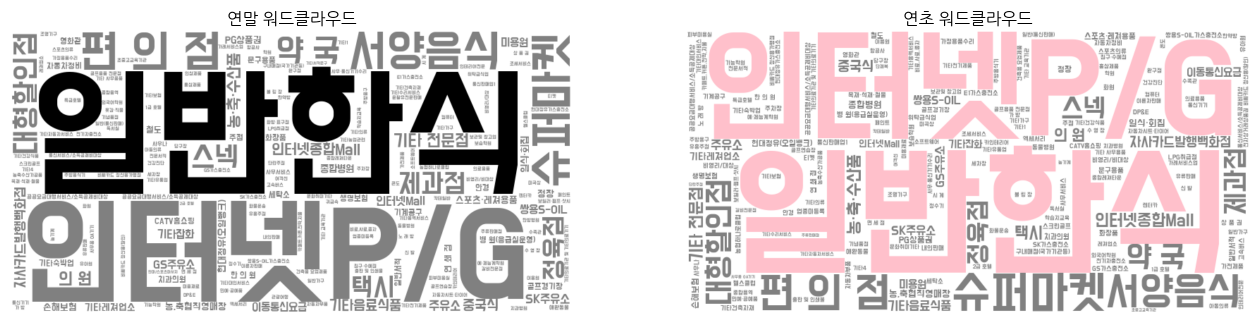

In [44]:
wordcloud_a = WordCloud(width=800, height=400, background_color='white',font_path = "BMDOHYEON_ttf.ttf").generate_from_frequencies(freq_last)

wordcloud_b = WordCloud(width=800, height=400, background_color='white',font_path = "BMDOHYEON_ttf.ttf").generate_from_frequencies(freq_first)

plt.figure(figsize=(16, 8))

wordcloud_a.recolor(color_func=custom_color_func1) 
wordcloud_b.recolor(color_func=custom_color_func2) 


plt.subplot(1, 2, 1)
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis('off')
plt.title("연말 워드클라우드")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis('off')
plt.title("연초 워드클라우드")

plt.show()

# 주거래 부거래용 결제 횟수 데이터셋

In [5]:
df1['거래년월'] = df1['거래년월'].astype(int)
data11 = df1.loc[df1.groupby('고객ID')['거래년월'].idxmax()]

data11

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
632583,202112,8148085642,슈퍼마켓,대구광역시,동구,5번이하,20000
632583,202112,2800789394,서양음식,부산광역시,부산진구,5번이하,10000
632583,202112,7428017497,인터넷종합Mall,서울특별시,강남구,5번이하,10000
632583,202112,3926398218,연 쇄 점,서울특별시,강남구,5번이하,10000
632583,202112,6773300779,약 국,경상북도,구미시,5번이하,10000
...,...,...,...,...,...,...,...
127009,202102,4203651799,인터넷P/G,서울특별시,마포구,5번이하,50000
127009,202101,9086049340,쌍용S-OIL,대구광역시,동구,5번이하,60000
127009,202101,6681903920,일반한식,대구광역시,달성군,5번이하,40000
127009,202101,6349438679,생명보험,서울특별시,종로구,5번이하,50000


In [6]:
data11['승인횟수'] = data11['승인건수'].apply(lambda x: 2.5 if x == '5번이하' else 
                                              7.5 if x == '5번초과 10번이하' else 
                                              12.5 if x == '10번초과 15번이하' else 
                                              17.5 if x == '15번초과 20번이하' else 
                                              22.5 if x == '20번 초과' else 0)

In [11]:
data111 =  data11[['거래년월','고객ID','승인횟수']]

In [12]:
data111.to_csv('data_승인횟수.csv', index=False, encoding='utf-8-sig')

- 가맹점

In [4]:
df1['가맹점업종모음'] = df1['가맹점업종명'].apply(lambda x: len(x.split(',')))

In [5]:
df1

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,가맹점업종모음
0,202112,4080934272,일반한식,경상북도,경주시,5번이하,20000,1
1,202112,4116127380,일반한식,경상북도,경주시,5번이하,20000,1
2,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,1
3,202112,2950007638,일반한식,경상북도,경주시,5번이하,60000,1
4,202112,2931907302,일반한식,경상북도,경주시,5번이하,10000,1
...,...,...,...,...,...,...,...,...
1070000,202101,9436485459,일식·회집,경상북도,상주시,5번이하,40000,1
1070001,202101,4079854553,일식·회집,경상북도,상주시,5번이하,90000,1
1070002,202101,9986820487,일식·회집,경상북도,상주시,5번이하,10000,1
1070003,202101,8230823000,일식·회집,경상북도,상주시,5번이하,20000,1


In [ ]:
data1111 =  df1[['가맹점업종모음','거래년월','고객ID','승인횟수']]

In [ ]:
data1111.to_csv('data_승인횟수와 가맹점.csv', index=False, encoding='utf-8-sig')